In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from utils import my_beep

In [4]:
%matplotlib inline

# Load data

In [5]:
folderPath = "./data/"
folderOutPath = "./results/"
os.listdir(folderPath)

['dengue_features_test.csv',
 'dengue_features_train.csv',
 'dengue_labels_train.csv',
 'submission_format.csv']

In [6]:
pathToDataTest = folderPath+"dengue_features_test.csv"
pathToDataTrain = folderPath+"dengue_features_train.csv"
pathToDataTrainLabel = folderPath+"dengue_labels_train.csv"
pathToDataSubmission = folderPath+"submission_format.csv"
data_pd = pd.read_csv(pathToDataTrain)

# Analyze data:
## Show data:


In [7]:
pd.set_option('display.max_columns', None)
data_pd.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8

In [8]:
data_pd.tail()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
1451  0.292514                 55.30             299.334286   
1452  0.225657                 86.47             298.330000   
1453  0.233714                 58.94             296.598571   
1454  0.325486                 59.67             296.345714   
1455  0.315757                 63.22             298.097143   

      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
1451             300.771429                   296.825714   
1452             299.392857                   296.452857   
1453             297.592857                   295.501429   
1454             297.521429                   295.324286   
1455             299.835714                   295.807143   

      reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
1451                      309.7                      294.5   
1452                      308.5                      291.9   
1453                      305.5                      292.4   
1454                      306.1                      291.9   
1455                      307.8                      292.3   

      reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
1451                            45.00                             88.765714   
1452                           207.10                             91.600000   
1453                            50.60                             94.280000   
1454                            62.33                             94.660000   
1455                            36.90                             89.082857   

      reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
1451                         55.30                              18.485714   
1452                         86.47                              18.070000   
1453                         58.94                              17.008571   
1454                         59.67                              16.815714   
1455                         63.22                              17.355714   

      reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
1451           9.800000           28.633333                11.933333   
1452           7.471429           27.433333                10.500000   
1453           7.500000           24.400000                 6.900000   
1454           7.871429           25.433333                 8.733333   
1455          11.014286           27.475000                 9.900000   

      station_max_temp_c  station_min_temp_c  station_precip_mm  
1451                35.4                22.4               27.0  
1452                34.7                21.7               36.6  
1453                32.2                19.2                7.4  
1454                31.2                21.0               16.0  
1455                33.7                22.2               20.4

In [33]:
data_pd_lab = pd.read_csv(pathToDataTrainLabel)
print(data_pd_lab.shape)
data_pd_lab.head()

(1456, 4)


city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

## Show properties:

In [9]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [10]:
desc = data_pd.describe(include='all')
desc

city         year   weekofyear week_start_date      ndvi_ne  \
count   1456  1456.000000  1456.000000            1456  1262.000000   
unique     2          NaN          NaN            1049          NaN   
top       sj          NaN          NaN      2007-04-16          NaN   
freq     936          NaN          NaN               2          NaN   
mean     NaN  2001.031593    26.503434             NaN     0.142294   
std      NaN     5.408314    15.019437             NaN     0.140531   
min      NaN  1990.000000     1.000000             NaN    -0.406250   
25%      NaN  1997.000000    13.750000             NaN     0.044950   
50%      NaN  2002.000000    26.500000             NaN     0.128817   
75%      NaN  2005.000000    39.250000             NaN     0.248483   
max      NaN  2010.000000    53.000000             NaN     0.508357   

            ndvi_nw      ndvi_se      ndvi_sw  precipitation_amt_mm  \
count   1404.000000  1434.000000  1434.000000           1443.000000   
unique          NaN          NaN          NaN                   NaN   
top             NaN          NaN          NaN                   NaN   
freq            NaN          NaN          NaN                   NaN   
mean       0.130553     0.203783     0.202305             45.760388   
std        0.119999     0.073860     0.083903             43.715537   
min       -0.456100    -0.015533    -0.063457              0.000000   
25%        0.049217     0.155087     0.144209              9.800000   
50%        0.121429     0.196050     0.189450             38.340000   
75%        0.216600     0.248846     0.246982             70.235000   
max        0.454429     0.538314     0.546017            390.600000   

        reanalysis_air_temp_k  reanalysis_avg_temp_k  \
count             1446.000000            1446.000000   
unique                    NaN                    NaN   
top                       NaN                    NaN   
freq                      NaN                    NaN   
mean               298.701852             299.225578   
std                  1.362420               1.261715   
min                294.635714             294.892857   
25%                297.658929             298.257143   
50%                298.646429             299.289286   
75%                299.833571             300.207143   
max                302.200000             302.928571   

        reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
count                   1446.000000                1446.000000   
unique                          NaN                        NaN   
top                             NaN                        NaN   
freq                            NaN                        NaN   
mean                     295.246356                 303.427109   
std                        1.527810                   3.234601   
min                      289.642857                 297.800000   
25%                      294.118929                 301.000000   
50%                      295.640714                 302.400000   
75%                      296.460000                 305.500000   
max                      298.450000                 314.000000   

        reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
count                 1446.000000                      1446.000000   
unique                        NaN                              NaN   
top                           NaN                              NaN   
freq                          NaN                              NaN   
mean                   295.719156                        40.151819   
std                      2.565364                        43.434399   
min                    286.900000                         0.000000   
25%                    293.900000                        13.055000   
50%                    296.200000                        27.245000   
75%                    297.900000                        52.200000   
max                    299.900000                       570.500000

In [12]:
data_non_nan = pd.read_csv(pathToDataTrain).dropna()
print(data_non_nan.shape[0],'full examples /',data_pd.shape[0], " All examples")

1199 full examples / 1456  All examples


In [13]:
not_nan_counts = desc.values[0]
nan_counts = data_pd.shape[0] - not_nan_counts.astype(int)
print("Count of None values per atribute: ", nan_counts)

Count of None values per atribute:  [  0   0   0   0 194  52  22  22  13  10  10  10  10  10  10  10  13  10
  10  43  43  20  14  22]


## Unique values count per atributte:

In [14]:
print('Uniqueness: ')
raw_data = data_pd.as_matrix()
for i in range(raw_data.shape[1]):
    column = raw_data[:,i]
    unique, counts = np.unique(column, return_counts=True)
    ourDict = dict(zip(unique, counts))
    print(len(ourDict))
    #print(ourDict)

Uniqueness: 
2
21
53
1049
1408
1417
1417
1410
1170
1186
610
1190
151
127
1049
1380
1170
1181
529
535
513
93
87
685


# Show correlations:

In [34]:
allY = data_pd_lab['total_cases']

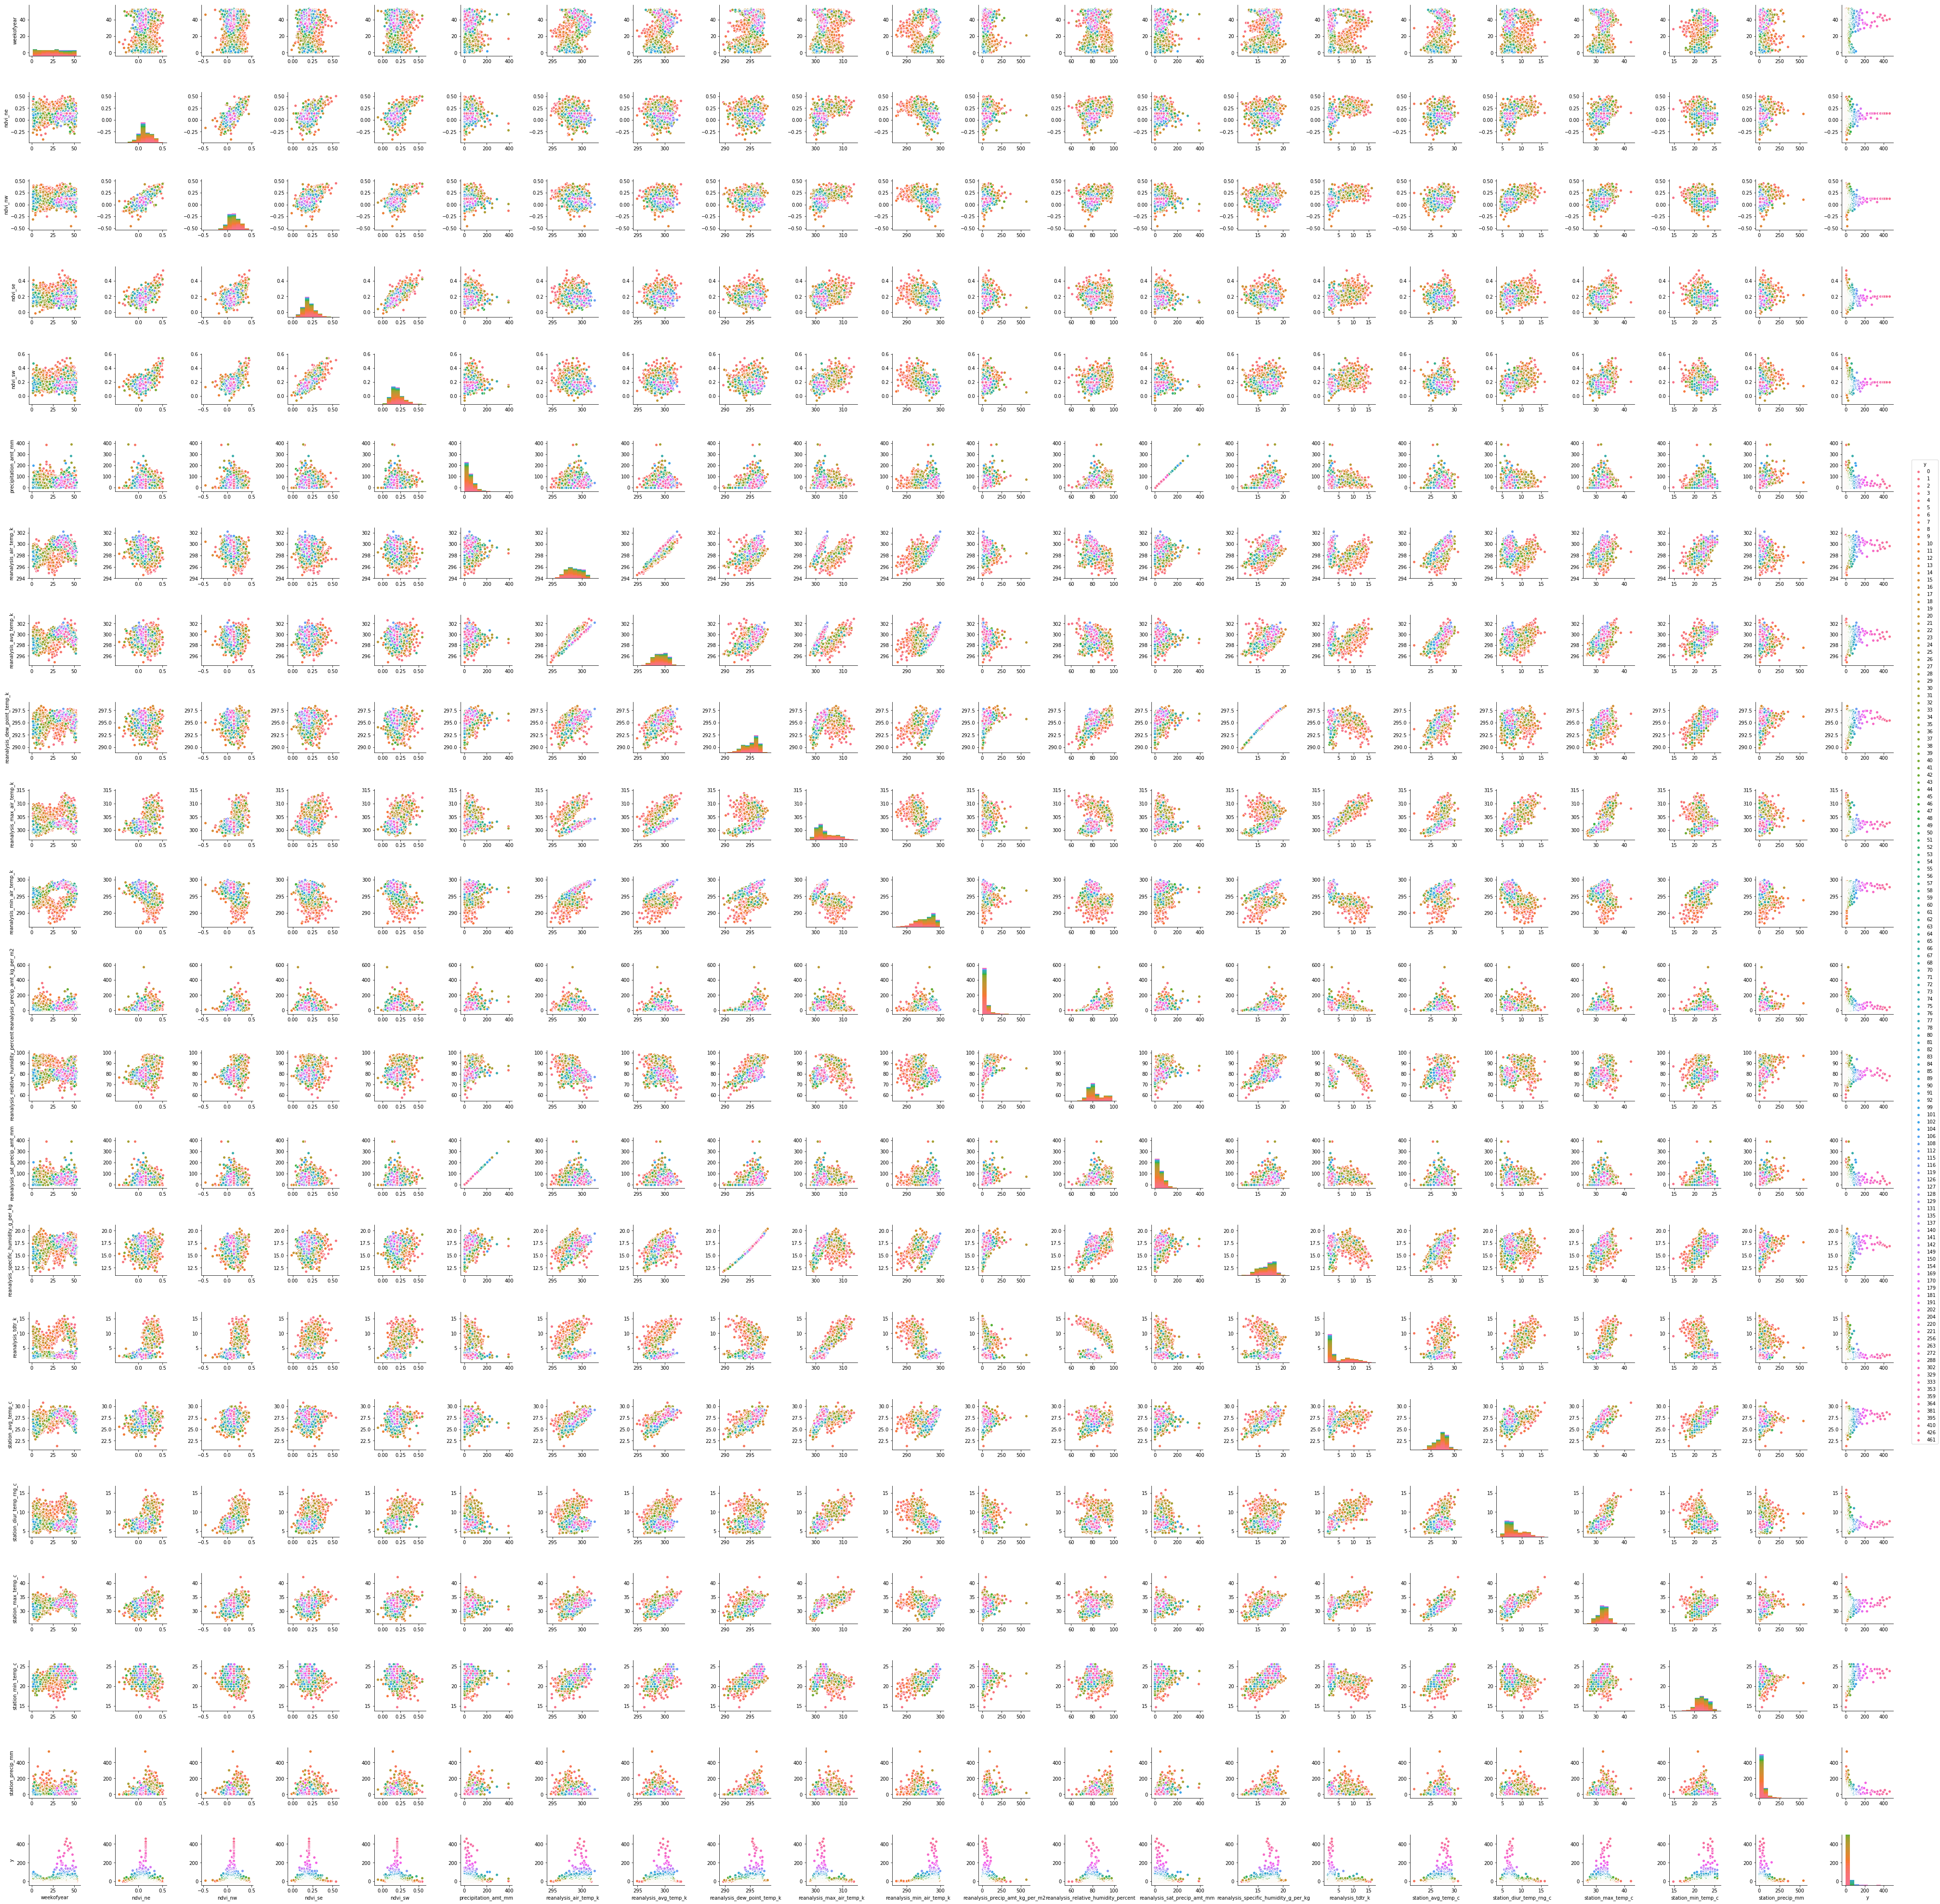

In [32]:
data_pd_plus_y = data_pd.assign(y=allY.values)
sns.pairplot(data_pd_plus_y,hue="y")

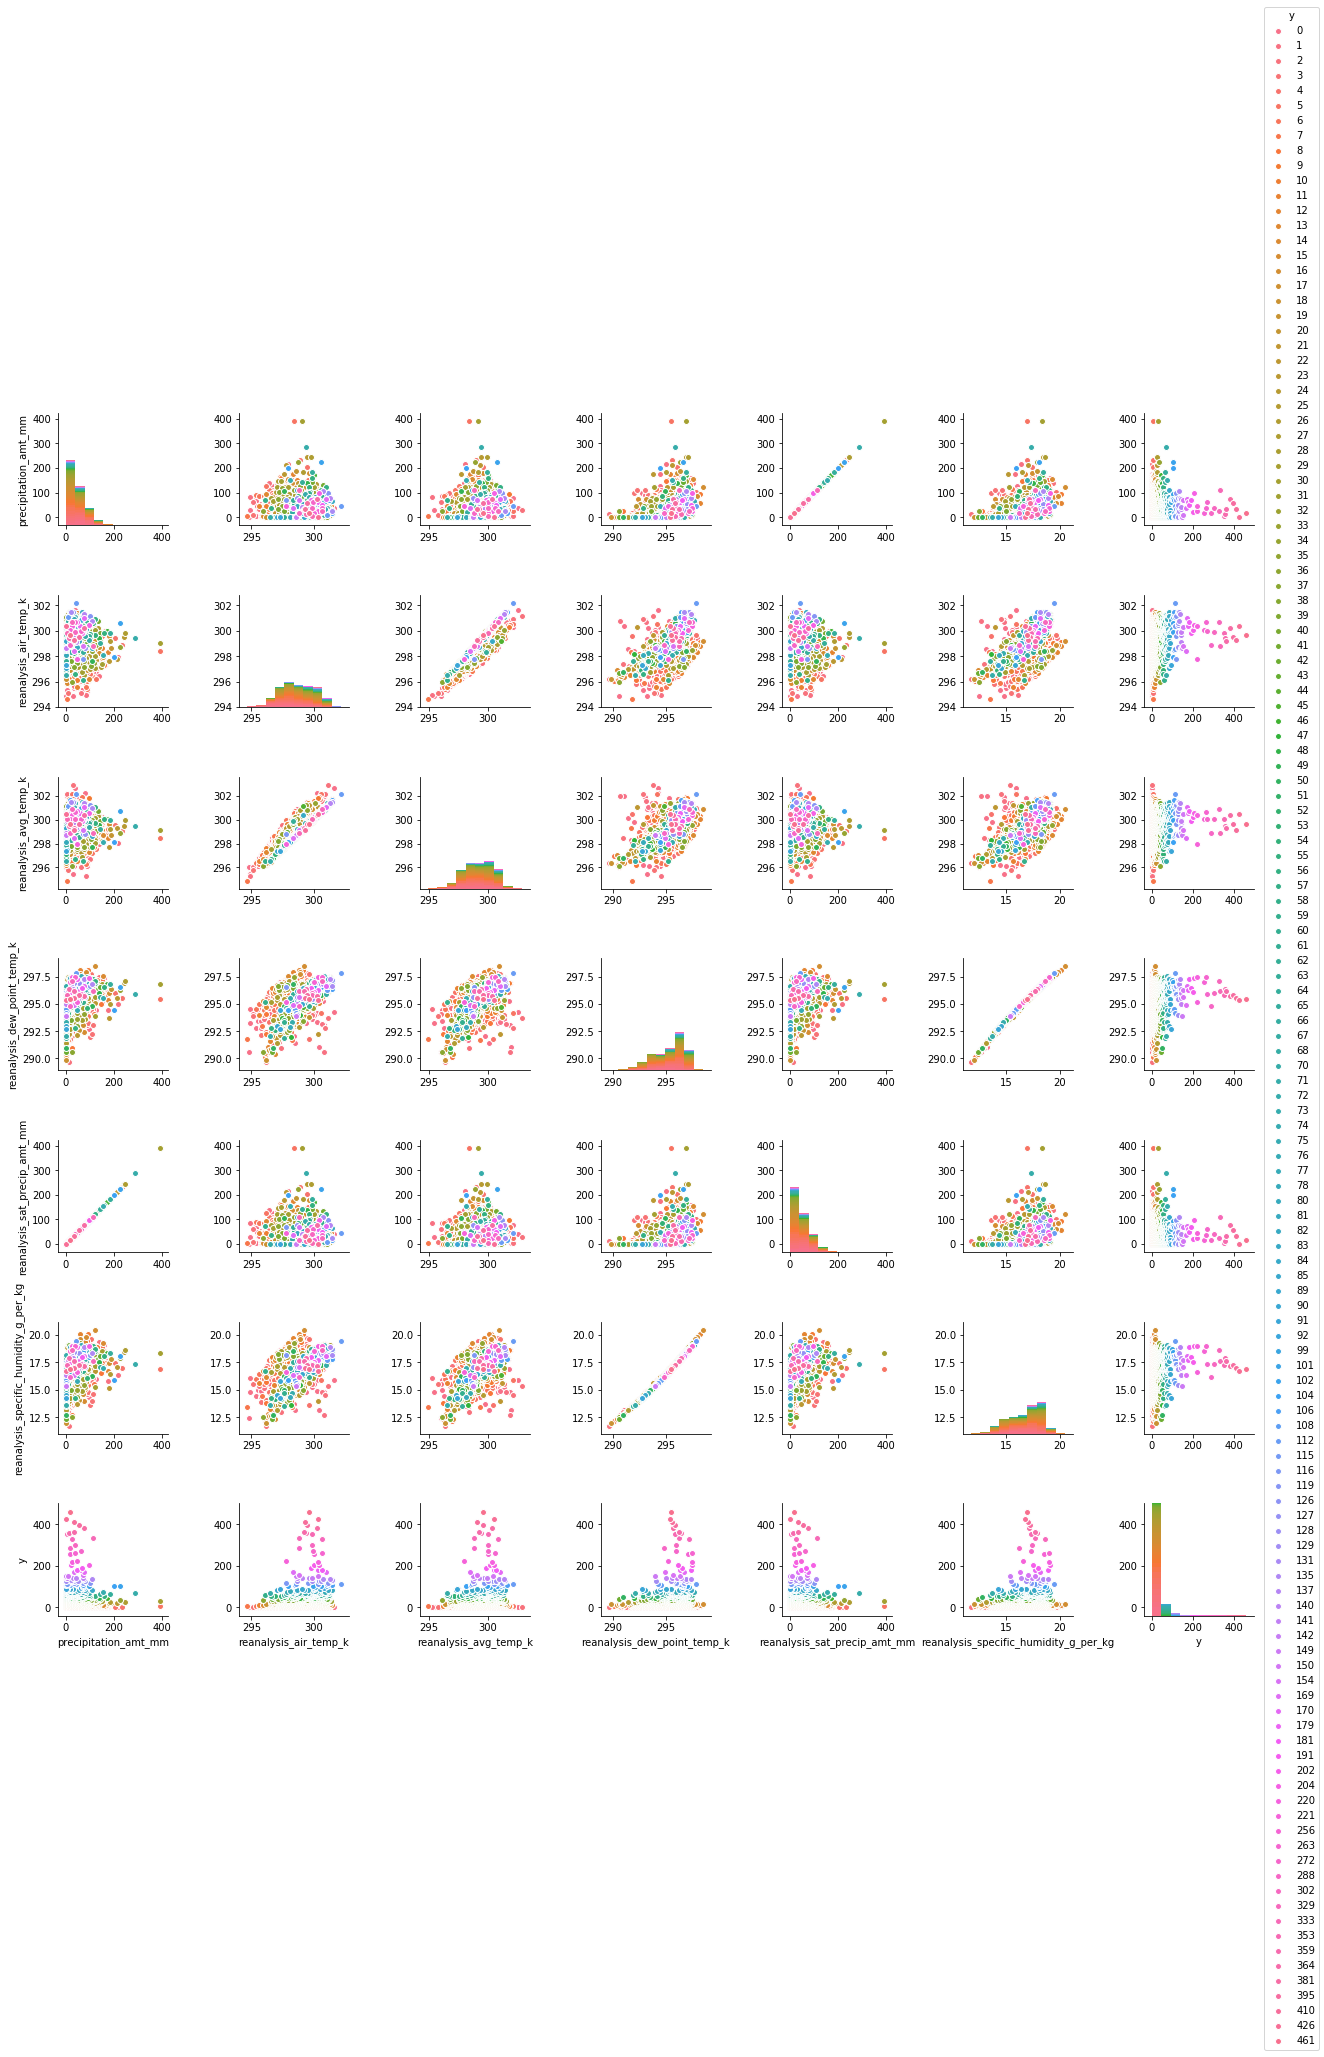

In [18]:
sns.pairplot(interesting_data_y,hue="y")
my_bip()

## Show values in clolumns with a high correlation

In [17]:
to_errase_column_pairs_names = ['precipitation_amt_mm',
       'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k',
       'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg']

interesting_data = data_pd[to_errase_column_pairs_names]
allY = data_pd_lab['total_cases']
interesting_data_y = interesting_data.assign(y=allY.values)
mean_attributes = interesting_data_y.mean()
interesting_data_y.fillna(mean_attributes, inplace=True)
interesting_data_y.head()

precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 12.42             297.572857             297.742857   
1                 22.82             298.211429             298.442857   
2                 34.54             298.781429             298.878571   
3                 15.36             298.987143             299.228571   
4                  7.52             299.518571             299.664286   

   reanalysis_dew_point_temp_k  reanalysis_sat_precip_amt_mm  \
0                   292.414286                         12.42   
1                   293.951429                         22.82   
2                   295.434286                         34.54   
3                   295.310000                         15.36   
4                   295.821429                          7.52   

   reanalysis_specific_humidity_g_per_kg  y  
0                              14.012857  4  
1                              15.372857  5  
2                              16.848571  4  
3                              16.672857  3  
4                              17.210000  6

# Show changes in time:

In [8]:
fig_size_width = 20
fig_size_heightPerOne = 1.7

In [10]:
groups = np.array(range(4,data_pd.shape[1]))
print(groups)
print(type(groups))
#print(groups.count())
print(groups.size)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
<class 'numpy.ndarray'>
20


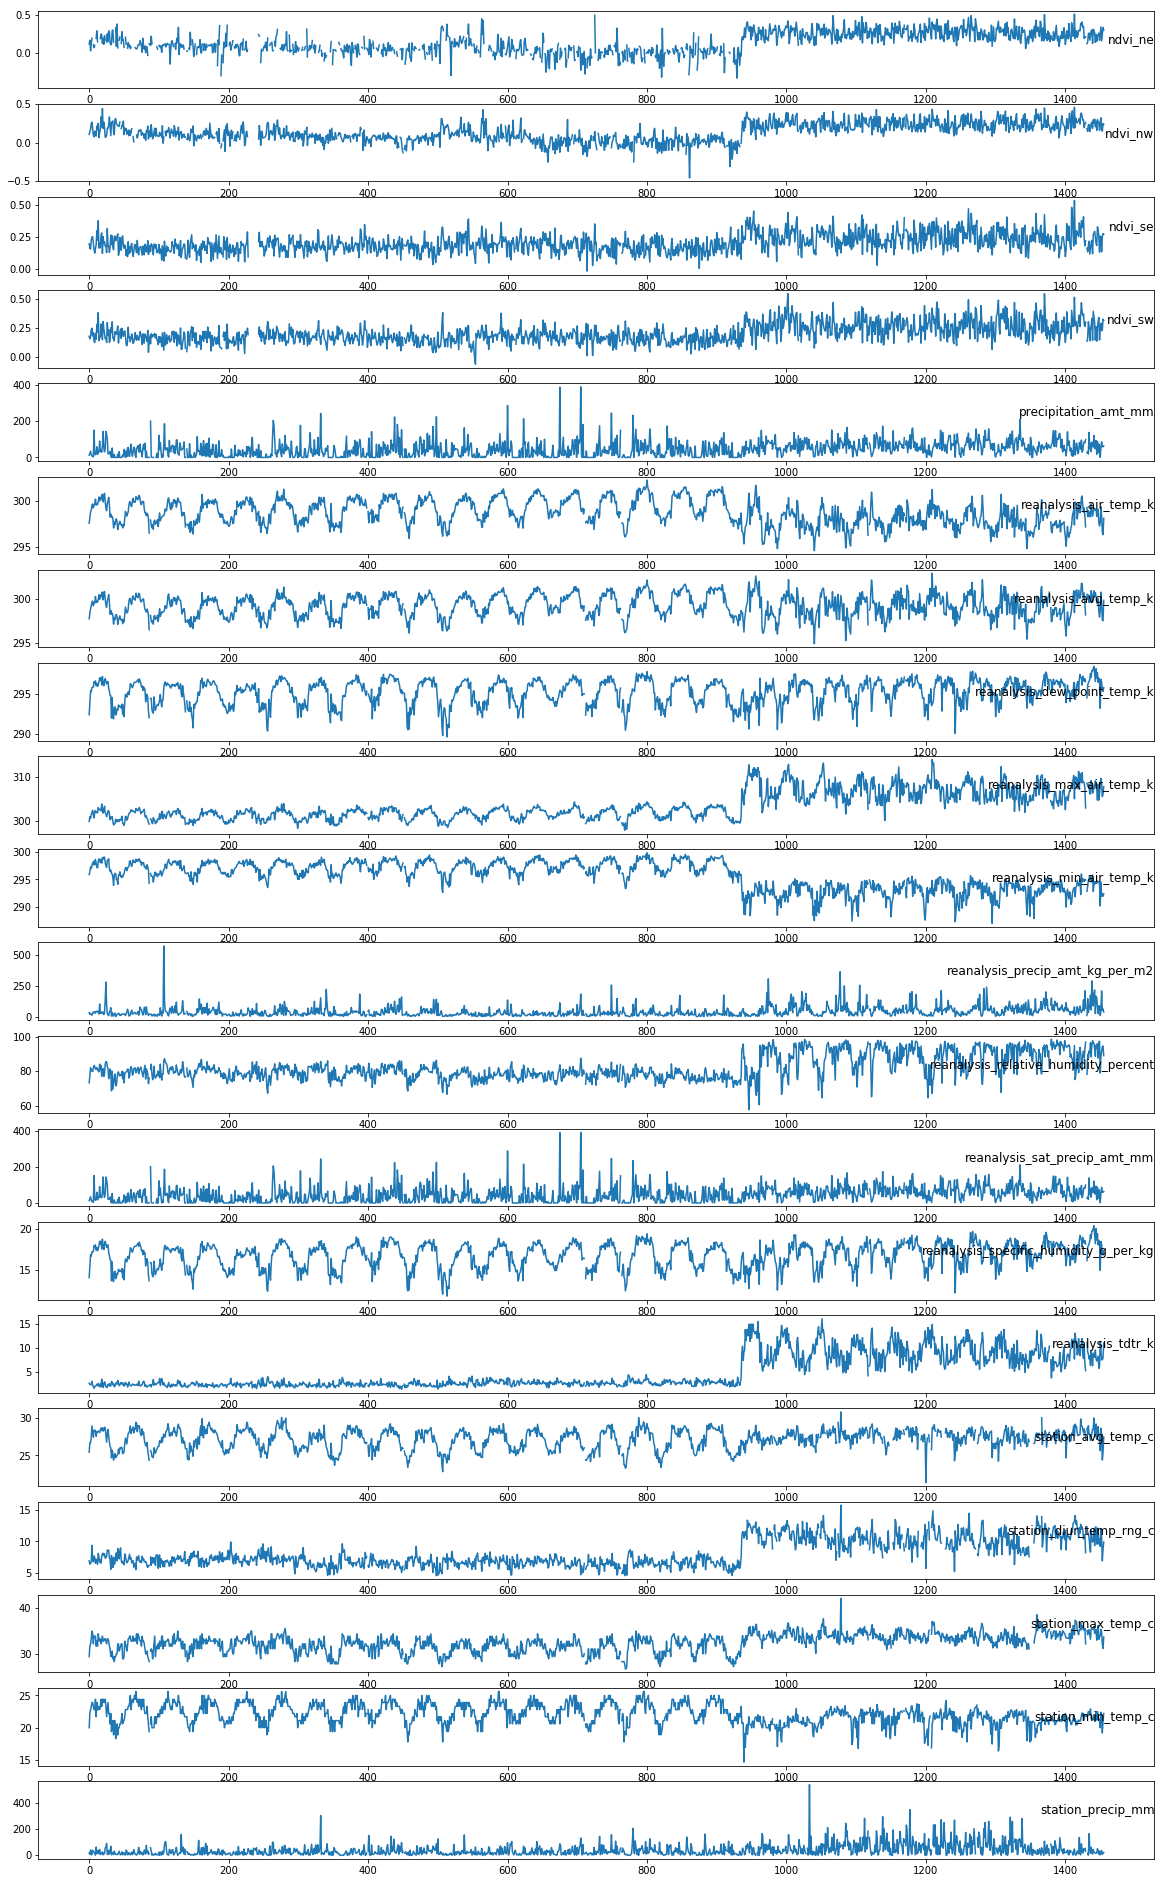

In [11]:
values = data_pd.values
i = 1
plt.figure(figsize=(fig_size_width,groups.size * 1.7))
for group in groups: # plot each column
    plt.subplot(groups.size, 1, i)
    plt.plot(values[:, group])
    plt.title(data_pd.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

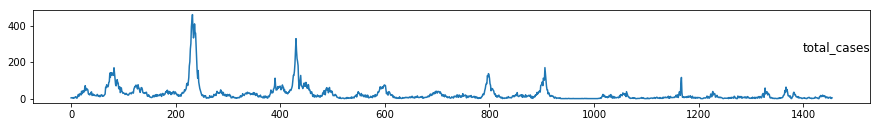

In [55]:
val_lab = data_pd_lab.values
class_index = 3
plt.figure(figsize=(15,1* 1.7))
plt.plot(val_lab[:, class_index])
plt.title(data_pd_lab.columns[class_index], y=0.5, loc='right')
plt.show()